In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torchtext

from pathlib import Path
from typing import Optional

In [2]:
%matplotlib inline

In [3]:
base = Path('..')
raw_data = Path('data/raw/filtered.tsv')

In [26]:
raw = pd.read_csv(base / raw_data, delimiter='\t', index_col=False)
raw = raw[raw.columns[1:]]

In [5]:
raw: pd.DataFrame = raw.sort_values('ref_tox', ascending=False)
raw.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
551255,His father would have used a booming voice to ...,his father would have answered with his thunde...,0.729428,0.091954,0.999724,0.004599
101676,You have to send those idiots back in.,you have to get those guys back there.,0.622852,0.000000,0.999723,0.000115
258368,Salina could be with that stupid cop.,Salina could be with the cop.,0.774944,0.210526,0.999723,0.000500
318050,And don't let those idiots in radiology hold y...,don't let them fool you in radiology.,0.711188,0.283019,0.999723,0.000874
70934,My idiot friend here brought marijuana... - on...,my friend here took a marijuana...,0.715508,0.396552,0.999722,0.000161


In [6]:
text: str = raw.loc[0].reference
print(text)
lower_text = text.lower()
print(lower_text)

If Alkar is flooding her with psychic waste, that explains the high level of neurotransmitters.
if alkar is flooding her with psychic waste, that explains the high level of neurotransmitters.


In [7]:
symbols = [
    '.', ',', ';', '!', '?', '^', '&', '*',
    '%', '@', '#', '$', '_', '+', '-', '=',
    '>', '<', ':', '~', '1', '31'
]

for symbol in symbols:
    contains = raw[
        raw['reference'].str.contains(symbol, regex=False) |
        raw['translation'].str.contains(symbol, regex=False)
        ]
    if contains.empty:
        print(f"Dataset does bot contains '{symbol}'")
    else:
        ref_entry = contains['reference'].iloc[0]
        trn_entry = contains['translation'].iloc[0]
        print(
            f"Dataset contains '{symbol}', "
            f"Entry: {ref_entry if symbol in ref_entry else trn_entry}"
        )

Dataset contains '.', Entry: His father would have used a booming voice to wrench a reply from this stupid machine.
Dataset contains ',', Entry: The idiot, Max. He never should have sold it to you guys.
Dataset contains ';', Entry: You've a brain; even these idiots can prepare a wall.
Dataset contains '!', Entry: You idiots! You have betrayed the revolution.
Dataset contains '?', Entry: you really have to let this crash decide for you?
Dataset contains '^', Entry: 'Though you have stolen from the Acoma, and killed a slave boy, I have not gone to this ^rouble simply to see you hang, Lujan.'
Dataset contains '&', Entry: Suck on this, a&m!
Dataset contains '*', Entry: Fuck you, *, not so hard!
Dataset contains '%', Entry: With your fucking 48% body fat. And, you, scrawny little bastard!
Dataset does bot contains '@'
Dataset contains '#', Entry: # But you say he's just a friend
Dataset contains '$', Entry: Ow! A gut-shot husband and an idiot son who just gave away $5 million worth of cocai

In [8]:
from matplotlib.ticker import PercentFormatter


def plot_dist(values: pd.Series,
              title: str,
              x_label: str,
              step: float = 0.05,
              values_range: Optional[tuple[float, float]] = None):
    if not values_range:
        values_range = (0, 1)
    values = values.to_numpy()
    bins = np.arange(values_range[0], values_range[1] + step, step)

    plt.figure(figsize=(12, 4))
    plt.axes().yaxis.set_major_formatter(PercentFormatter(xmax=1))
    plt.hist(values, bins=bins, weights=np.ones_like(values) / float(len(values)))
    plt.xticks(bins)
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()

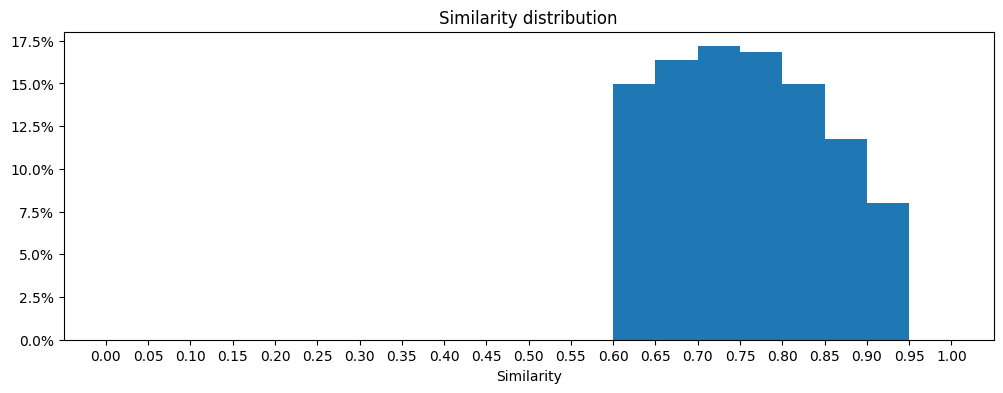

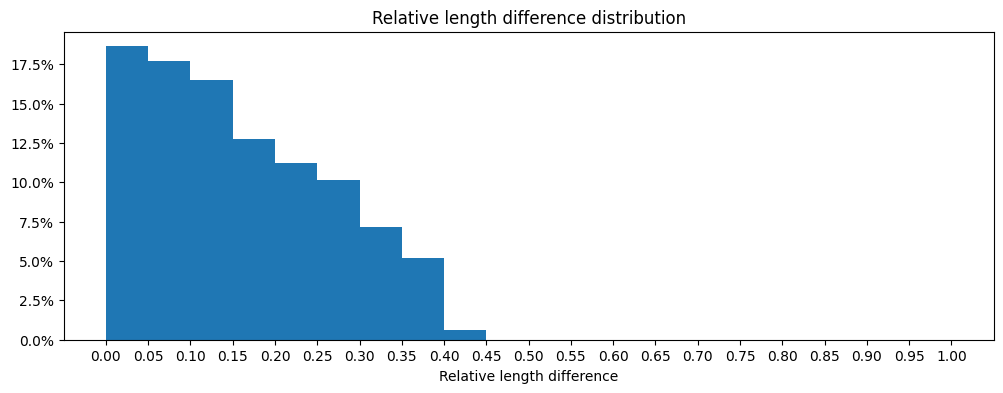

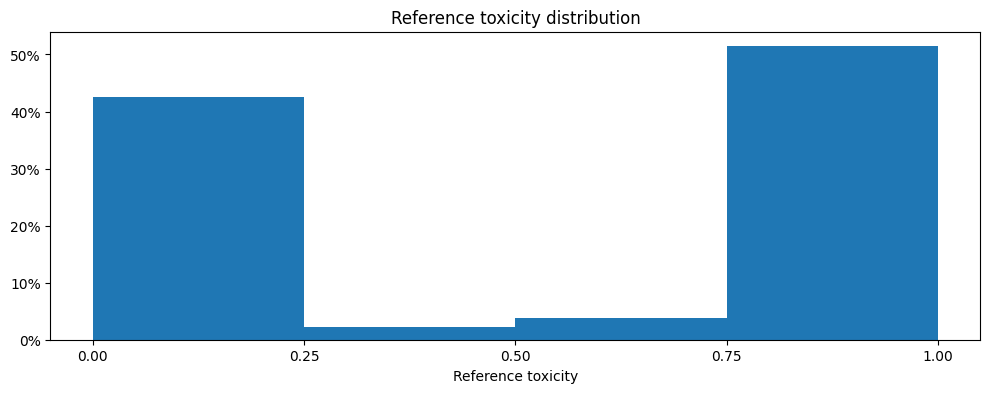

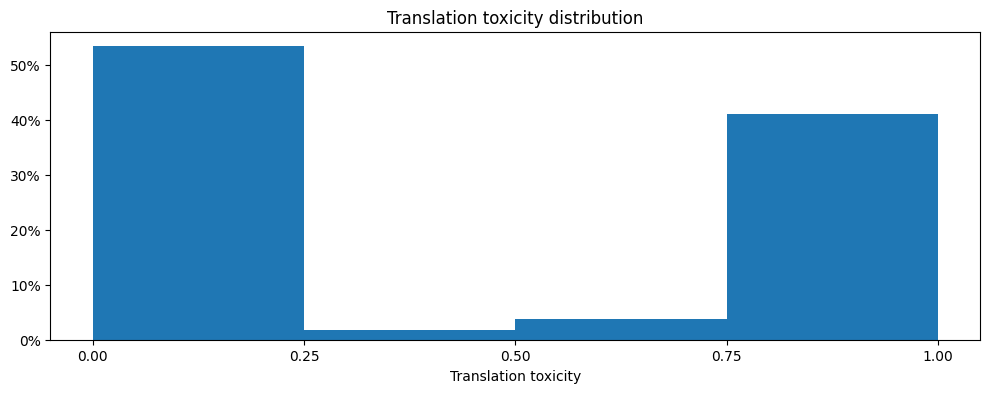

In [9]:
plot_dist(raw.similarity, 'Similarity distribution', 'Similarity')
plot_dist(raw.lenght_diff, 'Relative length difference distribution', 'Relative length difference')
plot_dist(raw.ref_tox, 'Reference toxicity distribution', 'Reference toxicity', step=0.25)
plot_dist(raw.trn_tox, 'Translation toxicity distribution', 'Translation toxicity', step=0.25)


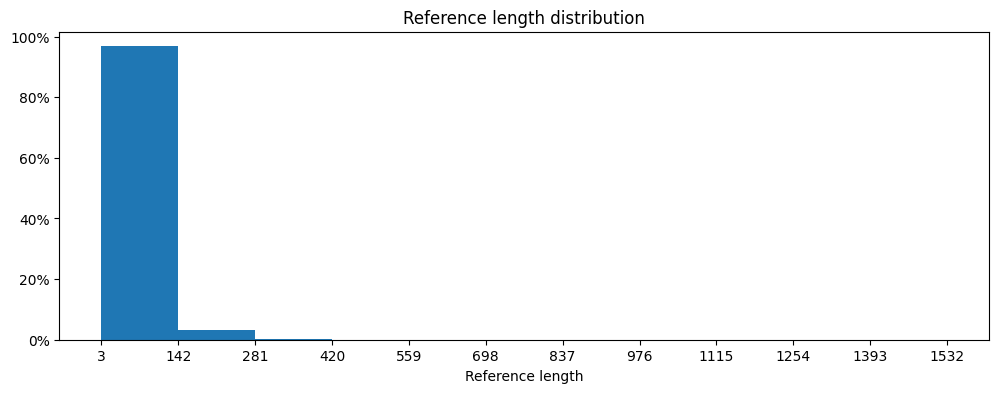

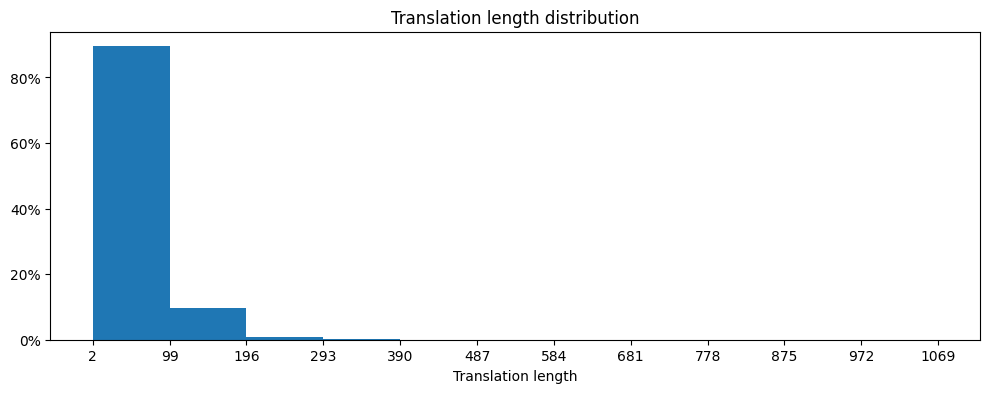

In [10]:
ref_lengths = raw.reference.apply(len)
ref_lengths_max = ref_lengths.max()
ref_lengths_min = ref_lengths.min()
ref_lengths_step = int((ref_lengths_max - ref_lengths_min) / 10)

trn_lengths = raw.translation.apply(len)
trn_lengths_max = trn_lengths.max()
trn_lengths_min = trn_lengths.min()
trn_lengths_step = int((trn_lengths_max - trn_lengths_min) / 10)

plot_dist(
    ref_lengths, 'Reference length distribution', 'Reference length',
    step=ref_lengths_step, values_range=(ref_lengths_min, ref_lengths_max)
)
plot_dist(
    ref_lengths, 'Translation length distribution', 'Translation length',
    step=trn_lengths_step, values_range=(trn_lengths_min, trn_lengths_max)
)

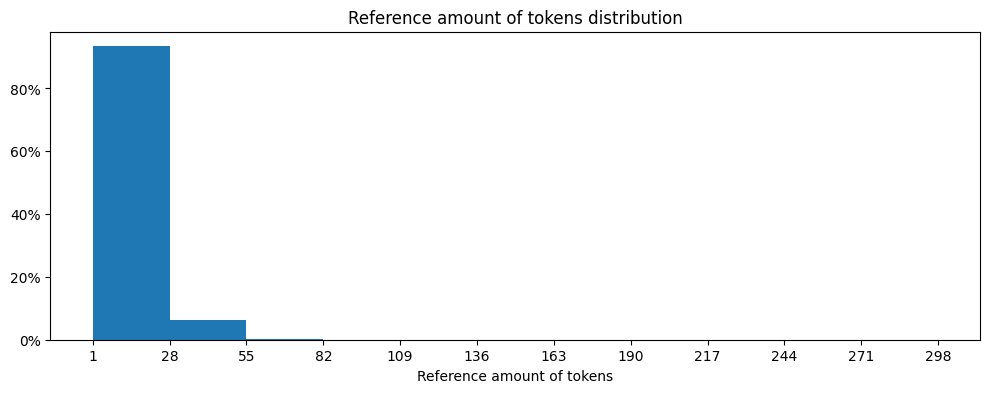

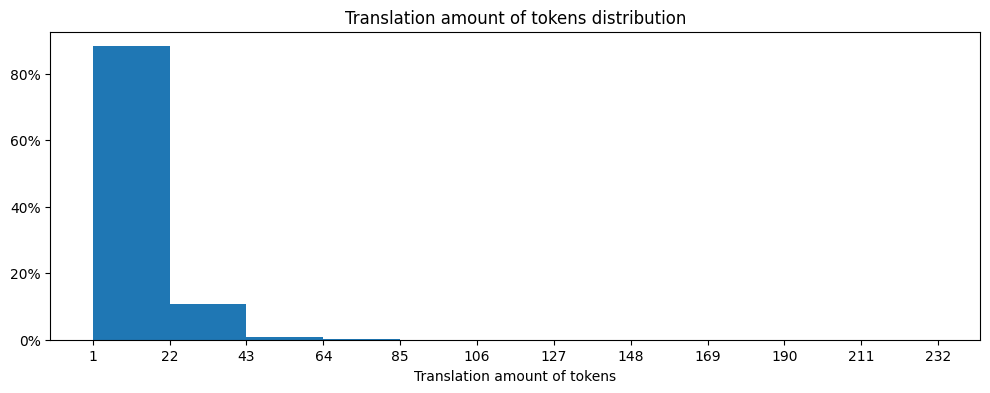

In [11]:
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')

ref_tokens = raw.reference.apply(tokenizer).apply(len)
ref_tokens_max = ref_tokens.max()
ref_tokens_min = ref_tokens.min()
ref_tokens_step = int((ref_tokens_max - ref_tokens_min) / 10)

trn_tokens = raw.translation.apply(tokenizer).apply(len)
trn_tokens_max = trn_tokens.max()
trn_tokens_min = trn_tokens.min()
trn_tokens_step = int((trn_tokens_max - trn_tokens_min) / 10)

plot_dist(
    ref_tokens, 'Reference amount of tokens distribution', 'Reference amount of tokens',
    step=ref_tokens_step, values_range=(ref_tokens_min, ref_tokens_max)
)
plot_dist(
    trn_tokens, 'Translation amount of tokens distribution', 'Translation amount of tokens',
    step=trn_tokens_step, values_range=(trn_tokens_min, trn_tokens_max)
)